# **Medical Cost Personal Datasets**

The objective is to predict insurance expenses (medical cost).

* **age:** Age of primary beneficiary

* **sex:** Insurance contractor gender (female, male)

* **bmi:** Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight ($kg / m^2$) using the ratio of height to weight. Ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** If the person smokes or not

* **region:** The beneficiary's residential area in the US (northeast, southeast, southwest, northwest)

* **charges:** Individual medical costs billed by health insurance

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Load dataset
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Type of variable in each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
#Rows and columns of the dataframe
df.shape

(1338, 7)

In [5]:
#Check for missing data
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Range of the variables
for col in df.columns:
    print(f"Range of {col}: {df[col].min(),df[col].max()}")

Range of age: (18, 64)
Range of sex: ('female', 'male')
Range of bmi: (15.96, 53.13)
Range of children: (0, 5)
Range of smoker: ('no', 'yes')
Range of region: ('northeast', 'southwest')
Range of charges: (1121.8739, 63770.42801)


In [7]:
#Encode categorical variables with numerical values
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\yamil\AppData\Local\Temp\ipykernel_23136\2087058907.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_23136\2087058907.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_23136\2087058907.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [8]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [9]:
#Unique values of the variables
for column in df.columns:
    print(f"Unique values of {column}: {df[column].nunique()}")

Unique values of age: 47
Unique values of sex: 2
Unique values of bmi: 548
Unique values of children: 6
Unique values of smoker: 2
Unique values of region: 4
Unique values of charges: 1337


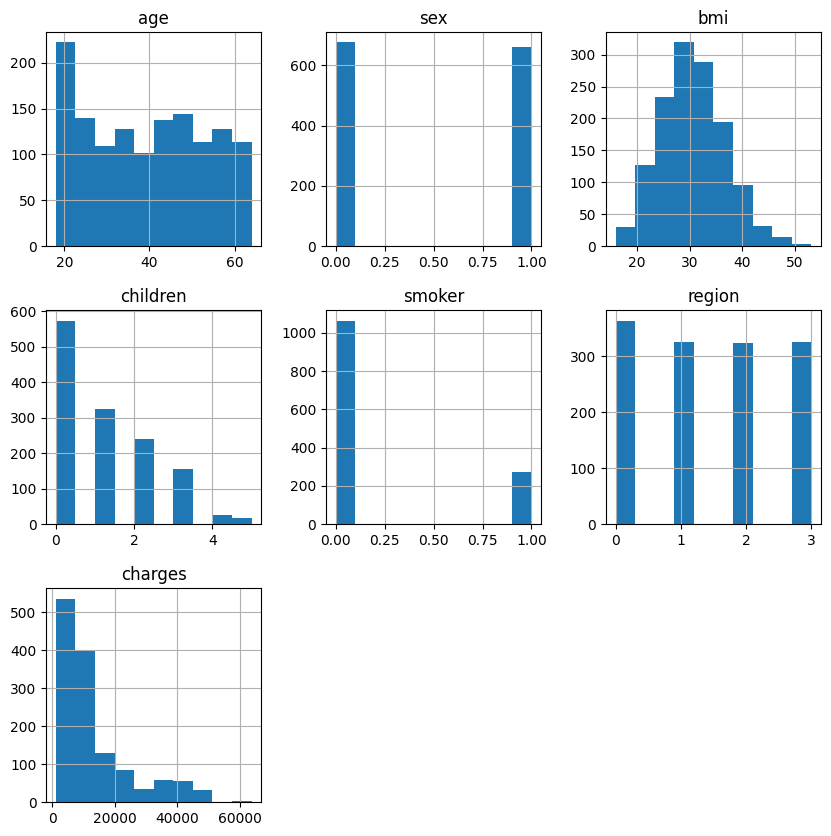

In [10]:
#Plot histograms for all variables
df.hist(figsize=(10,10))
plt.show()

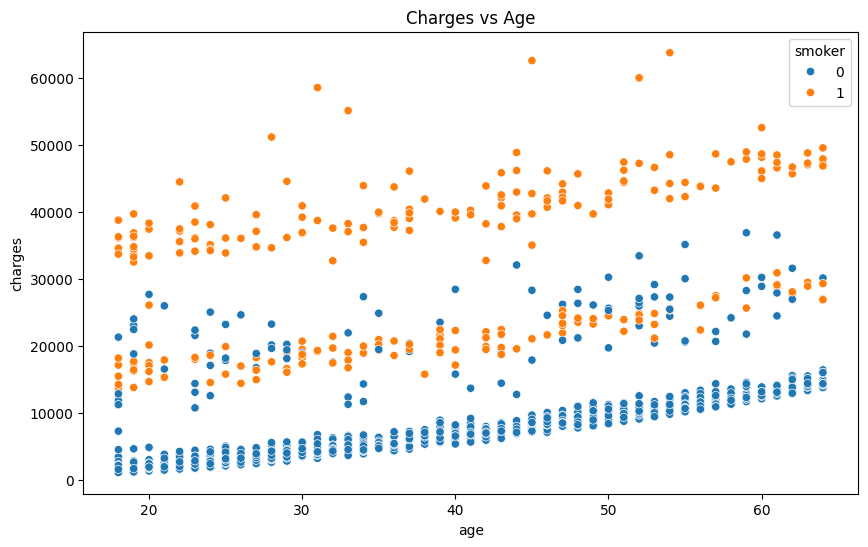

In [11]:
#Plot charges vs age
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['age'], y=df['charges'], hue='smoker', data=df)
plt.title('Charges vs Age')
plt.show()

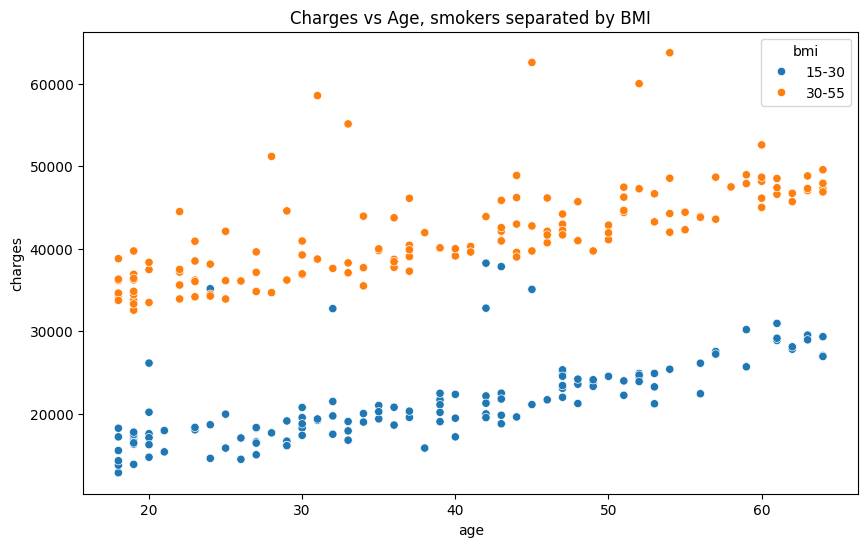

In [12]:
#Plot charges vs age
plt.figure(figsize=(10,6))

#Create 2 classes for bmi
cutoff_point = 30 
df_copy = df.copy()
df_copy['bmi'] = pd.cut(df_copy['bmi'], bins = [-np.inf, cutoff_point, np.inf], labels = ['15-30', '30-55'])

sns.scatterplot(x=df_copy[df_copy['smoker']==1]['age'], y=df_copy['charges'], hue='bmi', data=df_copy)
plt.title('Charges vs Age, smokers separated by BMI')
plt.show()

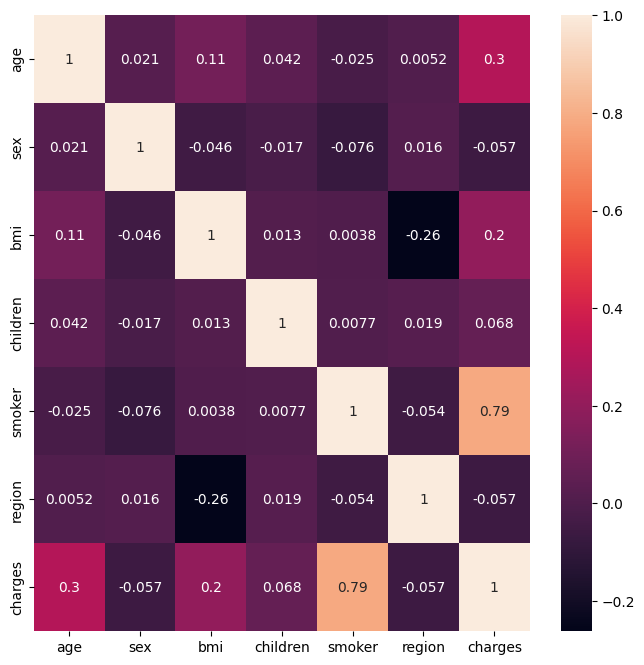

In [13]:
#Check the correlation between variables
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True)

The correlation between the smoker variable and the charges variable is very high. This indicates that whether a person smokes or not significantly affects medical costs.

## **Linear Regression**

In [14]:
X = df.drop(['charges'], axis = 1) #Predictor variables
y = df['charges'] #Target variable

In [15]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape, y_train.shape}")
print(f"Test: {X_test.shape, y_test.shape}")

Train: ((1070, 6), (1070,))
Test: ((268, 6), (268,))


In [16]:
#Instantiate and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
#Scrore for the training set
lr.score(X_train, y_train) 

0.7413131194887537

In [18]:
#Score for the test set
lr.score(X_test, y_test) 

0.783021587162344

In [19]:
#Intercept
lr.intercept_

-12580.898279441999

In [20]:
#Coefficients
lr.coef_

array([2.56625541e+02, 1.71347528e+01, 3.35095743e+02, 4.22627296e+02,
       2.36724982e+04, 1.65804576e+02])

In [21]:
#Predictions
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 33685623.354144424
R^2 Score: 0.783021587162344


In [22]:
#Function to plot the actual vs predicted charges
def plot_actual_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    y = np.arange(0, y_test.max())
    plt.plot(y, y, linestyle='--', color='red')
    plt.xlabel('Actual charges')
    plt.ylabel('Predicted charges')
    plt.title('Actual vs. Predicted Charges')
    plt.grid(True)
    plt.show()

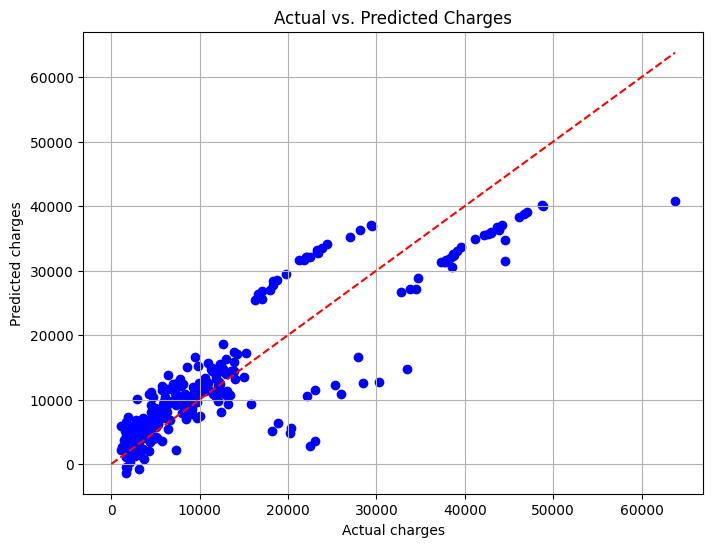

In [23]:
plot_actual_predicted(y_test, y_pred)

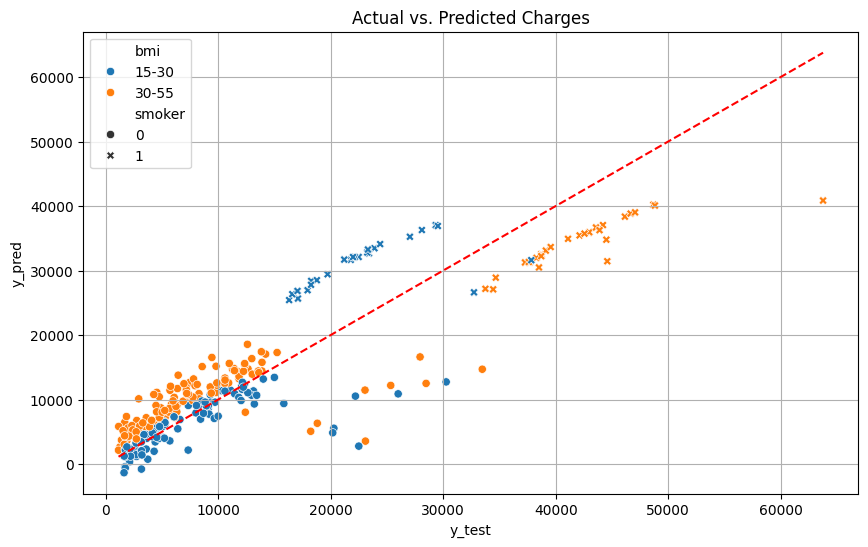

In [24]:
#Create a DataFrame with y_test, y_pred, smoker, and bmi data
data = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'smoker': X_test['smoker'] ,
    'bmi': X_test['bmi']  
})

#Create bins for bmi and categorize the data
data['bmi'] = pd.cut(data['bmi'], bins = [-np.inf, 30, np.inf], labels = ['15-30', '30-55'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='y_test', y='y_pred', hue='bmi', style='smoker', data=data)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Charges')
plt.grid(True)
plt.show()

Two regressions could be created, one for smokers with BMI between 15-30 and another for others.

In [25]:
df['bmi_category'] = pd.cut(df['bmi'], bins=[-np.inf, 30, np.inf], labels=['15-30', '30-55'])

#Dataset for smokers with BMI between 15-30
df_15 = df[(df['smoker'] == 1) & (df['bmi_category'] == '15-30')]

#Dataset for others (non-smokers or BMI > 30)
df_others = df[(df['smoker'] == 0) | (df['bmi_category'] == '30-55')]

## Linear Regression for smokers with BMI between 15 and 30

Mean Squared Error: 2813182.90699737
R^2 Score: 0.8603056176975473


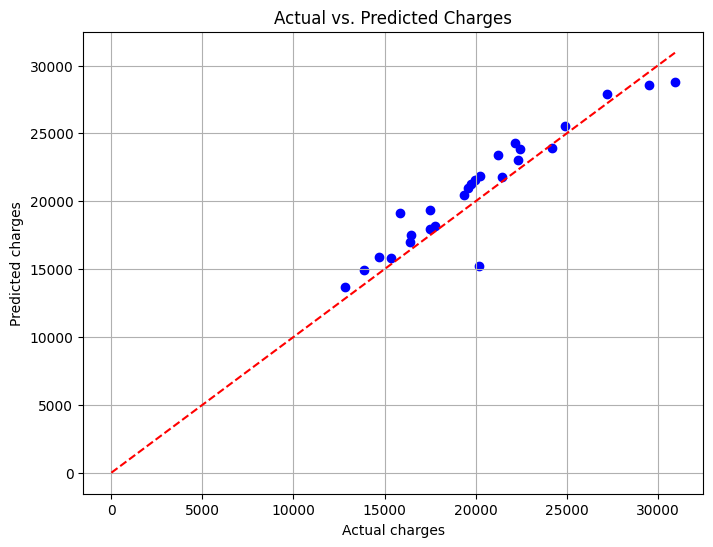

In [26]:
X_15 = df_15.drop(['charges', 'bmi_category'], axis=1) #Predictor variables
y_15 = df_15['charges'] #Target variable

#Split the data into training and test sets
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

#Instantiate and fit the model
lr_15 = LinearRegression()
lr_15.fit(X_train_15, y_train_15)

#Predictions
y_pred_15 = lr_15.predict(X_test_15)

mse_15 = mean_squared_error(y_test_15, y_pred_15)
r2_15 = r2_score(y_test_15, y_pred_15)

print(f'Mean Squared Error: {mse_15}')
print(f'R^2 Score: {r2_15}')

#Plot actual vs predicted charges for smokers with BMI between 15 and 30
plot_actual_predicted(y_test_15, y_pred_15)

## Linear Regression for smokers with BMI between 30 and 55

Mean Squared Error: 23374673.331075445
R^2 Score: 0.8507181008776477


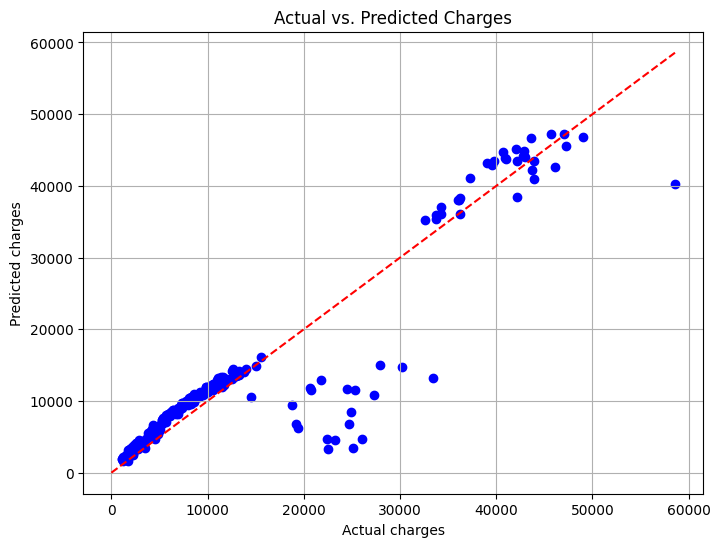

In [27]:
X_others = df_others.drop(['charges', 'bmi_category'], axis=1) #Predictor variables
y_others = df_others['charges'] #Target variable

#Split the data into training and test sets
X_train_others, X_test_others, y_train_others, y_test_others = train_test_split(X_others, y_others, test_size=0.2, random_state=42)

#Instantiate and fit the model
lr_others = LinearRegression()
lr_others.fit(X_train_others, y_train_others)

#Predictions
y_pred_others = lr_others.predict(X_test_others)

mse_others = mean_squared_error(y_test_others, y_pred_others)
r2_others = r2_score(y_test_others, y_pred_others)

print(f'Mean Squared Error: {mse_others}')
print(f'R^2 Score: {r2_others}')

#Plot actual vs predicted charges for smokers with BMI between 30 and 55
plot_actual_predicted(y_test_others, y_pred_others)

## **Polynomial Regression**

In [28]:
#Load dataset
df = pd.read_csv('insurance.csv')

#Encode categorical variables with numerical values
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\yamil\AppData\Local\Temp\ipykernel_23136\1739262438.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_23136\1739262438.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_23136\1739262438.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [29]:
df['bmi_category'] = pd.cut(df['bmi'], bins=[-np.inf, 30, np.inf], labels=['15-30', '30-55'])

#Dataset for smokers with BMI between 15-30
df_15 = df[(df['smoker'] == 1) & (df['bmi_category'] == '15-30')]

#Dataset for others (non-smokers or BMI > 30)
df_others = df[(df['smoker'] == 0) | (df['bmi_category'] == '30-55')]

In [30]:
#Function to perform polynomial regression (returns: trained polynomial regression model and polynomial features transformer)
def polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    
    return model, poly

In [31]:
#Function to evaluate the polynomial regression model (returns: predicted target values, MSE and R2)
def evaluate_model(model, poly, X_test, y_test):
    X_test_poly = poly.transform(X_test)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return y_pred, mse, r2

## Polynomial Regression for smokers with BMI between 15 and 30

Mean Squared Error: 3.428617929284411e-11
R^2 Score: 1.0


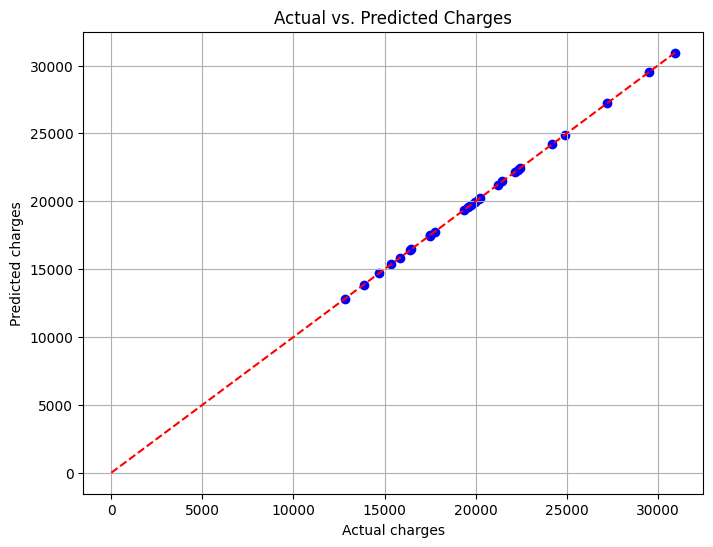

In [32]:
X_15 = df_15.drop(['charges', 'bmi_category'], axis=1) #Predictor variables
y_15 = df_15['charges'] #Target variable

#Split the data into training and test sets
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

#Perform polynomial regression with degree 5
model_15, poly_15 = polynomial_regression(X_15, y_15, degree=5)

#Evaluate the model
y_pred_15, mse_15, r2_15 = evaluate_model(model_15, poly_15, X_test_15, y_test_15)

print(f'Mean Squared Error: {mse_15}')
print(f'R^2 Score: {r2_15}')

#Plot actual vs predicted charges for smokers with BMI between 15 and 30
plot_actual_predicted(y_test_15, y_pred_15)

## Polynomial Regression for smokers with BMI between 30 and 55

Mean Squared Error: 23374673.331075445
R^2 Score: 0.8592977492526845


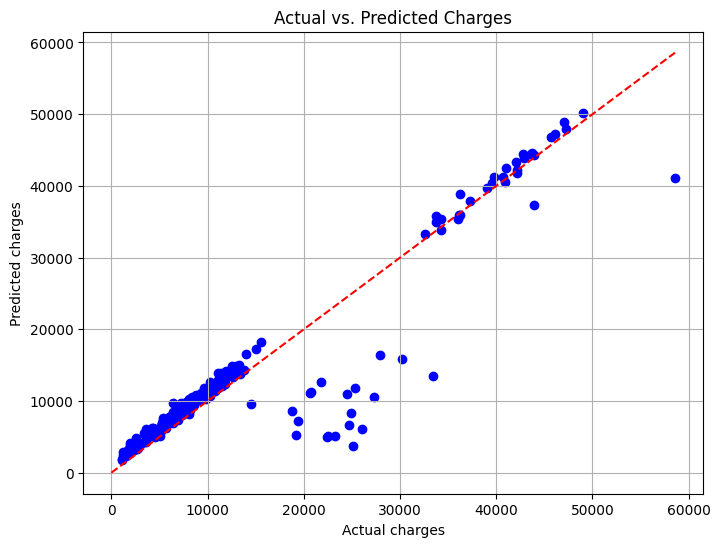

In [33]:
X_others = df_others.drop(['charges', 'bmi_category'], axis=1) #Predictor variables
y_others = df_others['charges'] #Target variable

#Split the data into training and test sets
X_train_others, X_test_others, y_train_others, y_test_others = train_test_split(X_others, y_others, test_size=0.2, random_state=42)

#Perform polynomial regression with degree 2
model_others, poly_others = polynomial_regression(X_train_others, y_train_others, degree=2)

#Evaluate the model
y_pred_others, rmse_others, r2_others = evaluate_model(model_others, poly_others, X_test_others, y_test_others)

print(f'Mean Squared Error: {mse_others}')
print(f'R^2 Score: {r2_others}')

#Plot actual vs predicted charges for smokers with BMI between 30 and 55
plot_actual_predicted(y_test_others, y_pred_others)